# Importações

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
import seaborn as sns
import matplotlib.dates as mdates
from dateutil import parser

# Conexão ao PostgreSQl

In [3]:
#user = "avnadmin"
#password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
#host = "postgresql-iscac.f.aivencloud.com"
#port = "25674"
#bucket = "Seasonality"

bucket = 'Seasonality'
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432


# URL de conexão com PostgreSQL
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

#Nome da tabela 
meteorology ='meteorology'

# Importar dados do PostgreSQl

In [4]:
try:
    # Ler os dados da tabela no DataFrame
    df = pd.read_sql(f"SELECT * FROM {meteorology}", con=engine)
    
    # Exibir as duas primeiras colunas
    print(df.head())  
except Exception as e:
    print(f"Erro ao importar os dados: {e}")

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2021-08-01 00:00:00  17.6       17.6  11.7     68.28     0.0         0.0   
1 2021-08-01 01:00:00  17.5       17.5  12.6     72.76     0.0         0.0   
2 2021-08-01 02:00:00  17.1       17.1  12.7     75.04     0.0         0.0   
3 2021-08-01 03:00:00  17.1       17.1  12.7     74.99     0.0         0.0   
4 2021-08-01 04:00:00  17.0       17.0  12.4     74.15     0.0         0.0   

  preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0       None       NaN       24.9    339.0            1020.7         NaN   
1       None       NaN       18.0    340.0            1020.7         0.0   
2       None       NaN       17.9    330.0            1020.0         NaN   
3       None       NaN       11.0    330.0            1019.9        30.0   
4       None       NaN        7.6    350.0            1019.5        10.0   

   visibility        conditions                             stations  
0  

# Visualizar Dados

In [5]:
df

,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,stations
0,2021-08-01 00:00:00,17.6,17.6,11.7,68.28,0.0,0.0,None,NaN,24.9,339.0,1020.7,NaN,10.0,Clear,"08535099999,08534099999,08579099999"
1,2021-08-01 01:00:00,17.5,17.5,12.6,72.76,0.0,0.0,None,NaN,18.0,340.0,1020.7,0.0,20.0,Clear,"08535099999,08534099999,08579099999"
2,2021-08-01 02:00:00,17.1,17.1,12.7,75.04,0.0,0.0,None,NaN,17.9,330.0,1020.0,NaN,10.0,Clear,"08535099999,08534099999,08579099999"
3,2021-08-01 03:00:00,17.1,17.1,12.7,74.99,0.0,0.0,None,NaN,11.0,330.0,1019.9,30.0,10.0,Partially cloudy,"08535099999,08534099999,08579099999"
4,2021-08-01 04:00:00,17.0,17.0,12.4,74.15,0.0,0.0,None,NaN,7.6,350.0,1019.5,10.0,20.0,Clear,"08535099999,08534099999,08579099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29968,2024-11-01 19:00:00,17.0,17.0,15.9,92.90,0.0,0.0,None,NaN,11.2,138.0,1016.8,56.3,10.0,Partially cloudy,"08534099999,08536099999,LPPT"
29969,2024-11-01 20:00:00,16.0,16.0,15.9,99.00,0.0,0.0,None,NaN,7.6,135.0,1017.0,37.3,10.0,Partially cloudy,"08534099999,08536099999,LPPT"
29970,2024-11-01 21:00:00,15.9,15.9,15.9,99.50,0.0,0.0,None,NaN,7.5,90.0,1017.9,37.3,11.6,Partially cloudy,"08534099999,08536099999,LPPT"
29971,2024-11-01 22:00:00,16.0,16.0,16.0,100.00,NaN,0.0,None,NaN,7.6,70.0,1018.0,50.0,10.0,Partially cloudy,"08536099999,LPPT"


In [13]:
df[['datetime', 'temp', 'precip', 'windspeed']]



,datetime,temp,precip,windspeed
0,2021-08-01 00:00:00,17.6,0.0,24.9
1,2021-08-01 01:00:00,17.5,0.0,18.0
2,2021-08-01 02:00:00,17.1,0.0,17.9
3,2021-08-01 03:00:00,17.1,0.0,11.0
4,2021-08-01 04:00:00,17.0,0.0,7.6
...,...,...,...,...
29968,2024-11-01 19:00:00,17.0,0.0,11.2
29969,2024-11-01 20:00:00,16.0,0.0,7.6
29970,2024-11-01 21:00:00,15.9,0.0,7.5
29971,2024-11-01 22:00:00,16.0,NaN,7.6


In [6]:
print(df.dtypes)

datetime            datetime64[ns]
temp                       float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
preciptype                  object
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
conditions                  object
stations                    object
dtype: object


In [7]:
print('Com NaN')
print('O ano 2021 tem',df[df['datetime'].dt.year == 2021]['precip'].isna().sum(), 'NaN')
print('O ano 2022 tem', df[df['datetime'].dt.year == 2022]['precip'].isna().sum(), 'NaN')
print('O ano 2023 tem', df[df['datetime'].dt.year == 2023]['precip'].isna().sum(), 'NaN')
print('O ano 2024 tem', df[df['datetime'].dt.year == 2024]['precip'].isna().sum(), 'NaN')
print('')
print('Com valores 0')
print((df[df['datetime'].dt.year == 2021]['precip'] == 0).sum())
print((df[df['datetime'].dt.year == 2022]['precip'] == 0).sum())
print((df[df['datetime'].dt.year == 2023]['precip'] == 0).sum())
print((df[df['datetime'].dt.year == 2024]['precip'] == 0).sum())


Com NaN
O ano 2021 tem 0 NaN
O ano 2022 tem 53 NaN
O ano 2023 tem 258 NaN
O ano 2024 tem 696 NaN

Com valores 0
3421
8349
8398
7994


In [8]:
df.isnull().sum()


datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip               1007
precipprob              0
preciptype          29169
windgust            27885
windspeed               7
winddir               183
sealevelpressure        0
cloudcover           7320
visibility              6
conditions              0
stations                0
dtype: int64

In [9]:
df.index

RangeIndex(start=0, stop=29973, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29973 entries, 0 to 29972
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          29973 non-null  datetime64[ns]
 1   temp              29973 non-null  float64       
 2   feelslike         29973 non-null  float64       
 3   dew               29973 non-null  float64       
 4   humidity          29973 non-null  float64       
 5   precip            28966 non-null  float64       
 6   precipprob        29973 non-null  float64       
 7   preciptype        804 non-null    object        
 8   windgust          2088 non-null   float64       
 9   windspeed         29966 non-null  float64       
 10  winddir           29790 non-null  float64       
 11  sealevelpressure  29973 non-null  float64       
 12  cloudcover        22653 non-null  float64       
 13  visibility        29967 non-null  float64       
 14  conditions        2997

In [ ]:
# Obtém o valor máximo e o valor mínimo da coluna 'precip'
precip_max = df['precip'].max()
precip_min = df['precip'].min()

print(f'Máximo de precipitação {precip_max}')
print(f'Mínimo de precipitação: {precip_min}')


Máximo de precipitação 63.0
Mínimo de precipitação: 0.0


In [17]:
# Obtém o valor máximo e o valor mínimo da coluna 'temp'
temp_max = df['temp'].max()
temp_min = df['temp'].min()

print(f'Máximo de temp: {temp_max}')
print(f'Mínimo de temp: {temp_min}')


Máximo de temp: 39.5
Mínimo de temp: 2.6


In [31]:
# Verificar se há valores não numéricos na coluna 'temp'
print(df['temp'].apply(pd.to_numeric, errors='coerce').isna().sum())


0


# Preenchimento de Valores Ausentes

### 1º Prencher o valor da 1h da manhã em falta

In [6]:
# Para o dia 27
start_time = '2022-03-27 00:00:00'
end_time = '2022-03-27 03:00:00'
df_selected = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]
print(df_selected.dtypes)

# Identificar as colunas numéricas e de texto
numeric_columns = df_selected.select_dtypes(include=['number']).columns
string_columns = df_selected.select_dtypes(include=['object']).columns

# Exibir as colunas para verificação
print(f'Colunas numéricas: {numeric_columns}')
print(f'Colunas de texto: {string_columns}')

# Resample para garantir que temos todas as horas de 00:00 a 03:00 (incluindo 1:00 AM ausente)
df_selected_resampled = df_selected.set_index('datetime').resample('H').asfreq()

# Interpolar para as colunas numéricas
df_selected_resampled[numeric_columns] = df_selected_resampled[numeric_columns].interpolate(method='linear')

# Preencher as colunas de texto de maneira adequada (usando forward fill ou preenchendo com o valor mais frequente)
for col in string_columns:
    # Verificando se há um valor de moda na coluna
    mode_value = df_selected_resampled[col].mode()
    if not mode_value.empty:
        # Se houver, preencher com o valor de moda (o mais frequente)
        df_selected_resampled[col] = df_selected_resampled[col].fillna(mode_value[0])
    else:
        # Caso não haja um valor de moda, usar 'ffill' (preenchendo com o valor anterior)
        df_selected_resampled[col] = df_selected_resampled[col].fillna(method='ffill')

# Resetando o índice para devolver a coluna 'datetime'
df_selected_resampled = df_selected_resampled.reset_index()

# Visualizando os dados após interpolação e preenchimento
print(f"\nDados após interpolação e preenchimento:\n", df_selected_resampled)




datetime            datetime64[ns]
temp                       float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
preciptype                  object
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
conditions                  object
stations                    object
dtype: object
Colunas numéricas: Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility'],
      dtype='object')
Colunas de texto: Index(['preciptype', 'conditions', 'stations'], dtype='object')

Dados após interpolação e preenchimento:
              datetime   temp  feelslike    dew  humidity  precip  precipprob  \
0 2022-03-

C:\Users\joana\AppData\Local\Temp\ipykernel_28016\2692349339.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_selected_resampled = df_selected.set_index('datetime').resample('H').asfreq()
C:\Users\joana\AppData\Local\Temp\ipykernel_28016\2692349339.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_selected_resampled[col] = df_selected_resampled[col].fillna(method='ffill')


# Analises 

### Para Temperatura

In [18]:
# Definir as estaçôes do ano
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [19]:
# Função para criar boxplot para temperatura por estações
def plot_temperature_by_season(df):
    df['season'] = df['datetime'].map(get_season)

    palette = sns.color_palette('coolwarm', 4)  # Gera 4 cores da paleta coolwarm
    palette[2], palette[3] = palette[3], palette[2]   # Substitui a cor do verão pela cor do outono (índice 2 = verão, índice 3 = outono)

    # Criar o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)
    plt.title('Temperature Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Temperature (°C)')
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\joana\AppData\Local\Temp\ipykernel_20160\1348530184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


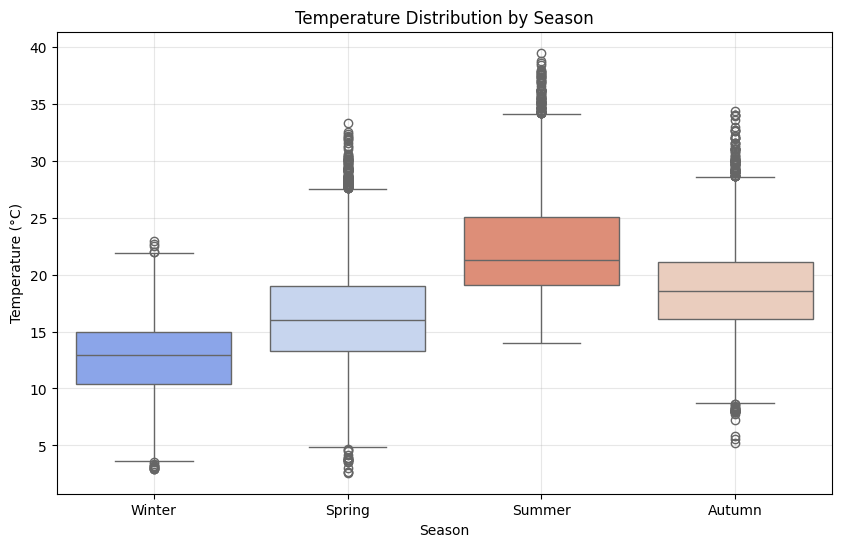

In [20]:
plot_temperature_by_season(df)

C:\Users\joana\AppData\Local\Temp\ipykernel_20160\1348530184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['datetime'].map(get_season)
C:\Users\joana\AppData\Local\Temp\ipykernel_20160\1348530184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


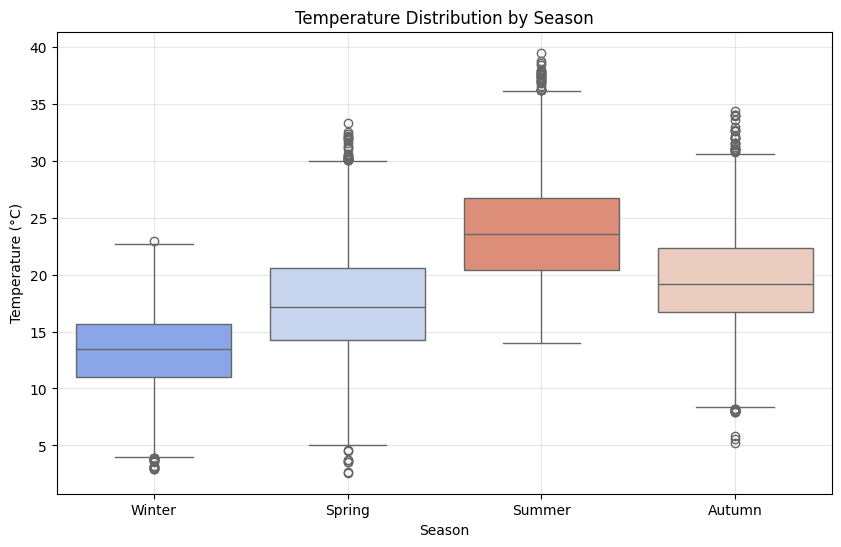

In [21]:
# extrair a noite para ver se há uma diferença, sendo que as temperaturas a noite no verão são frias. 

df['hour'] = df['datetime'].dt.hour  # Extrai a hora da coluna datetime
df_filtered = df[(df['hour'] >= 6) & (df['hour'] <= 20)]  # Filtra entre 6h da manhã e 20h

plot_temperature_by_season(df_filtered)


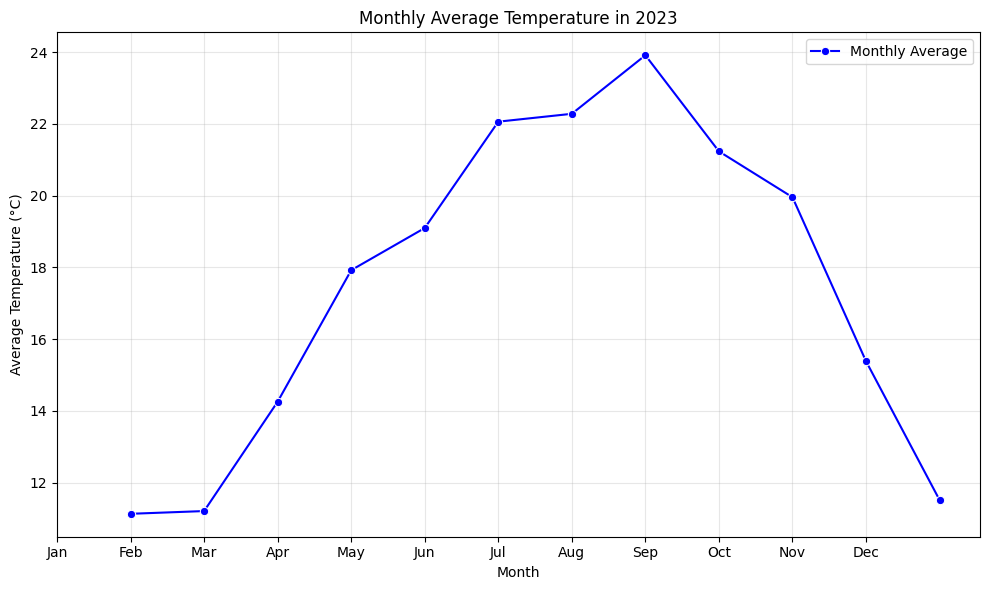

In [22]:
#Gráfico da temperatura média por mês do ano pretendido
# Extrair o ano e o mês da coluna datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Filtrar os dados para um ano específico
year_to_filter = 2023  
df_filtered = df[df['year'] == year_to_filter]

# Calcular a temperatura média por mês
monthly_avg_temp = df_filtered.groupby(['month'])['temp'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Gráfico de linha para a temperatura média mensal
sns.lineplot(x='month', y='temp', data=monthly_avg_temp, marker='o', color='b', label='Monthly Average')
plt.title(f'Monthly Average Temperature in {year_to_filter}')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

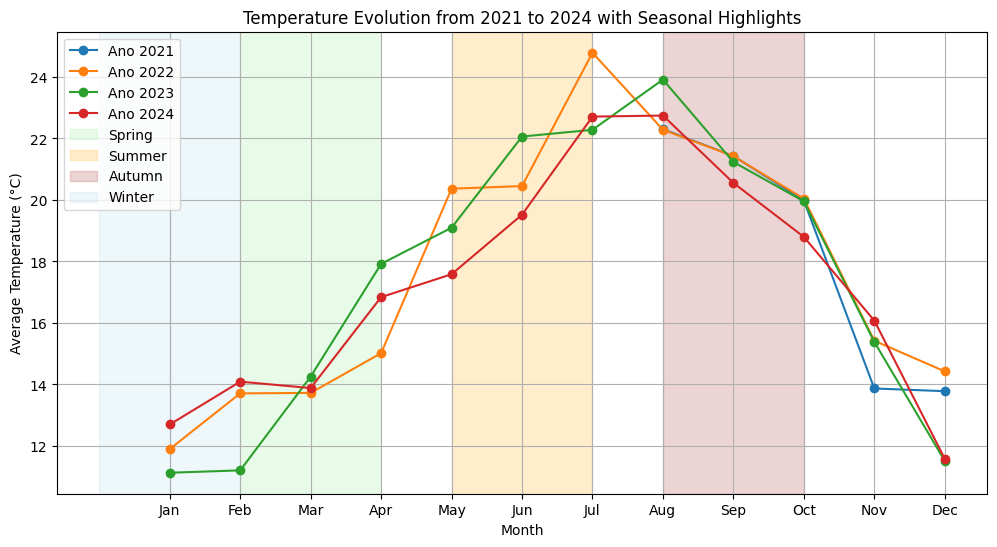

In [23]:
# Calcular a média mensal de temperatura para cada ano
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Média de temperatura por mês para cada ano
monthly_avg = df.groupby(['year', 'month'])['temp'].mean().unstack()

# Gráfico para médias mensais de temperatura
plt.figure(figsize=(12, 6))
for year in range(2021, 2025):
    plt.plot(monthly_avg.columns, monthly_avg.loc[year], marker='o', label=f'Ano {year}')

seasons = {
    'Spring': [3, 4, 5], 
    'Summer': [6, 7, 8], 
    'Autumn': [9, 10, 11], 
    'Winter': [12, 1, 2],  
}

# Cores para as estações
colors = {'Spring': 'lightgreen', 'Summer': 'orange', 'Autumn': 'brown', 'Winter': 'lightblue'}

# Adicionar faixas de estação no gráfico
for season, months in seasons.items():
    if season == 'Winter':
        # Dezembro do ano atual (11)
        plt.axvspan(11, 11, color=colors[season], alpha=0.2, label='Winter')
        # Janeiro (0) e Fevereiro (1) do ano seguinte
        plt.axvspan(0, 1, color=colors[season], alpha=0.2)
        plt.axvspan(1, 2, color=colors[season], alpha=0.2)
    else:
        plt.axvspan(months[0] - 1, months[-1] - 1, color=colors[season], alpha=0.2, label=season)

# gráfico
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Evolution from 2021 to 2024 with Seasonal Highlights')
plt.xticks(monthly_avg.columns, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



### Para a Percipitação

In [24]:
# Função para criar um boxplot para precipitação por estação
def plot_precipitation_by_season(df,start_date, end_date):
     df_filtered = df[(df['datetime'] >= pd.to_datetime(start_date)) & (df['datetime'] <= pd.to_datetime(end_date))]

    # Criar uma nova coluna 'season' com as estações
     df_filtered['season'] = df_filtered['datetime'].apply(get_season)

    # Definir a paleta de cores
     palette = sns.color_palette('coolwarm', 4)
     palette[2], palette[3] = palette[3], palette[2]

    # Criar o boxplot
     plt.figure(figsize=(10, 6))
     sns.boxplot(x='season', y='precip', data=df_filtered, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)
     plt.title('Precipitation Distribution by Season')
     plt.xlabel('Season')
     plt.ylabel('Precipitation (mm)')
     plt.grid(alpha=0.3)
     plt.show()



C:\Users\joana\AppData\Local\Temp\ipykernel_20160\3689468042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['season'] = df_filtered['datetime'].apply(get_season)
C:\Users\joana\AppData\Local\Temp\ipykernel_20160\3689468042.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='precip', data=df_filtered, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


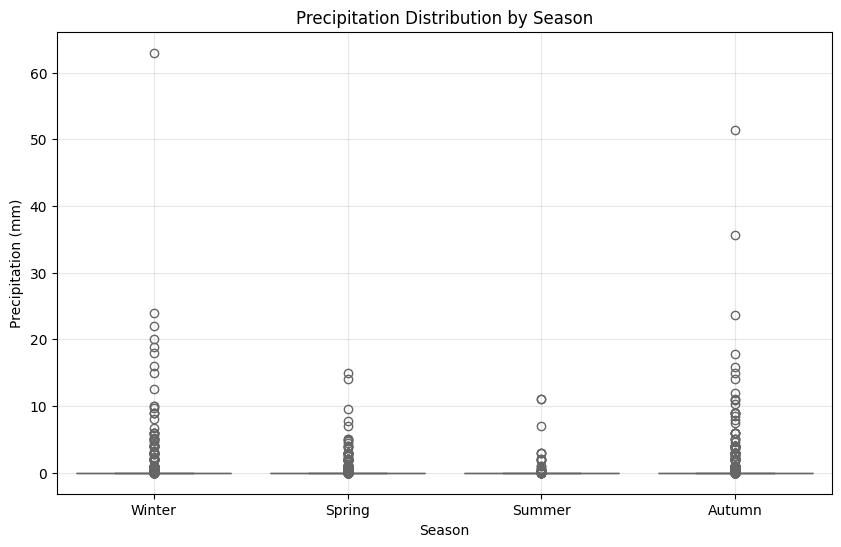

In [26]:
s_date = '2021-08-01'
e_date = '2024-12-31'
plot_precipitation_by_season(df,s_date, e_date)

In [27]:
# o outlier maior em outono (parece a ser um outlier falso, não encontro noticias sobre este dia)
# Filtrar apenas o outono
autumn_data = df[df['season'] == 'Autumn']

# Encontrar o maior valor de precipitação
outlier_day = autumn_data[autumn_data['precip'] == autumn_data['precip'].max()]
print(outlier_day)


                 datetime  temp  feelslike   dew  humidity  precip  \
28645 2022-10-11 13:00:00  22.5       22.5  18.4     77.53   51.42   

       precipprob preciptype  windgust  windspeed  winddir  sealevelpressure  \
28645       100.0       rain       NaN       10.8     50.0            1019.1   

       cloudcover  visibility              conditions  \
28645        29.1        10.0  Rain, Partially cloudy   

                           stations  season  hour  year  month  
28645  08535099999,08534099999,LPPT  Autumn    13  2022     10  


In [28]:
# Função para criar gráfico de barras para percipitação por estações

def plot_precipitation_bars(df,start_date, end_date):
    df_filtered = df[(df['datetime'] >= pd.to_datetime(start_date)) & (df['datetime'] <= pd.to_datetime(end_date))]

    # Criar coluna 'season' e remover linhas com valores NaN
    df_filtered['season'] = df_filtered['datetime'].apply(get_season)
    df_filtered = df_filtered.dropna(subset=['precip', 'season'])

    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

    # Calcular média e mediana para cada estação dentro do intervalo
    means = [df_filtered[df_filtered['season'] == season]['precip'].mean() for season in seasons]
    medians = [df_filtered[df_filtered['season'] == season]['precip'].median() for season in seasons]

    # Configuração do gráfico de barras
    x = np.arange(len(seasons))  # Posições no eixo X
    bar_width = 0.35  # Largura das barras

    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width/2, means, bar_width, label='Mean', color='red')
    plt.bar(x + bar_width/2, medians, bar_width, label='Median', color='black')

    plt.title(f'Precipitation Mean and Median by Season\n({start_date} to {end_date})')
    plt.xlabel('Season')
    plt.ylabel('Precipitation (mm)')
    plt.xticks(x, seasons)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


C:\Users\joana\AppData\Local\Temp\ipykernel_20160\1181220394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['season'] = df_filtered['datetime'].apply(get_season)


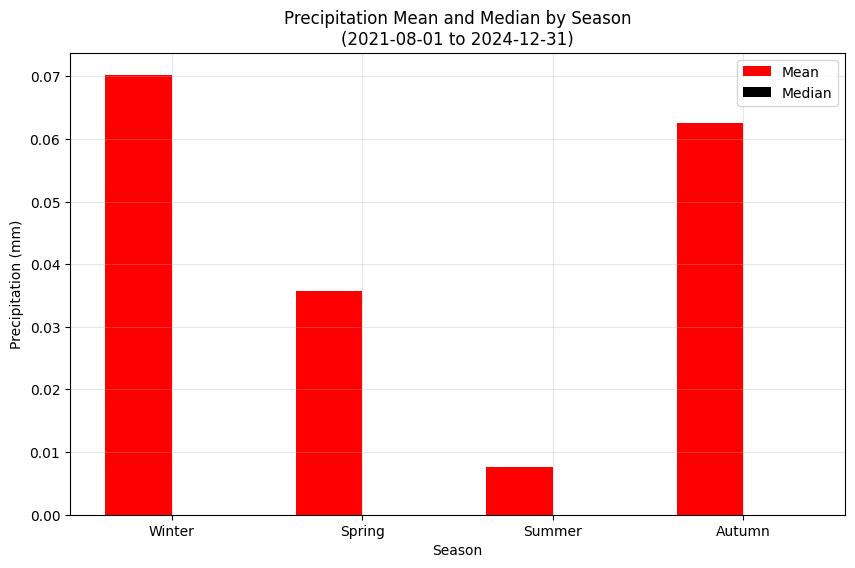

In [29]:
s_date = '2021-08-01'
e_date = '2024-12-31'
plot_precipitation_bars(df,s_date,e_date)

In [30]:
ano_especifico = 2022
# Filtrar o DataFrame para o ano específico
df_ano = df[df['datetime'].dt.year == ano_especifico]  

print(df_ano.groupby('season')['precip'].agg(['mean', 'median']))

# Pode-se ver que a mediana é zéro. é por isso que não aparace no gráfico em cima. 
# Como a mediana é menos sensível a valores extremos, se houver muitos dias secos e poucos dias com chuva intensa, a mediana pode ser zero ou próxima de zero


            mean  median
season                  
Autumn  0.102751     0.0
Spring  0.065183     0.0
Summer  0.003844     0.0
Winter  0.091772     0.0


In [ ]:
ano_especifico = 2024  

# Filtrar o DataFrame para o ano específico
df_ano = df[df['datetime'].dt.year == ano_especifico]  

# Contar o total de dias no ano
total_days_ano = len(df_ano)

# Contar os dias sem chuva (precipitação = 0)
dry_days_ano = len(df_ano[df_ano['precip'] == 0])

# Calcular a percentagem de dias sem chuva 
percentage_dry_days_ano = (dry_days_ano / total_days_ano) * 100

print(f'Percentagem de dias sem chuva em {ano_especifico}: {percentage_dry_days_ano:.2f}%')


Percentagem de dias sem chuva em 2024: 91.02%
